In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import napari
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from napari.utils.notebook_display import nbscreenshot

from napari_sediment.widgets.spectral_indices_widget import SpectralIndexWidget
plt.style.use('default')
import os
synth_path = Path(os.path.expanduser("~")).joinpath('Sediment_synthetic')

# Spectral indices

After having pre-processed the image, proceeded with spectral reduction and identified end-members, we can finally quantify spectra using indices via the ```SpectralIndexWidget```:

In [3]:
viewer =napari.Viewer()
self = SpectralIndexWidget(viewer)
viewer.window.add_dock_widget(self);

In [4]:
export_folder = synth_path.joinpath('sediment_export')
self._on_click_select_export_folder(export_folder=export_folder)
self.import_project()
#self._on_click_select_all()
self.viewer.layers['imcube'].visible = False

## Main

In the main tab we select once again our export data folder. Clicking on load project will load both the image and the end-member spectra.

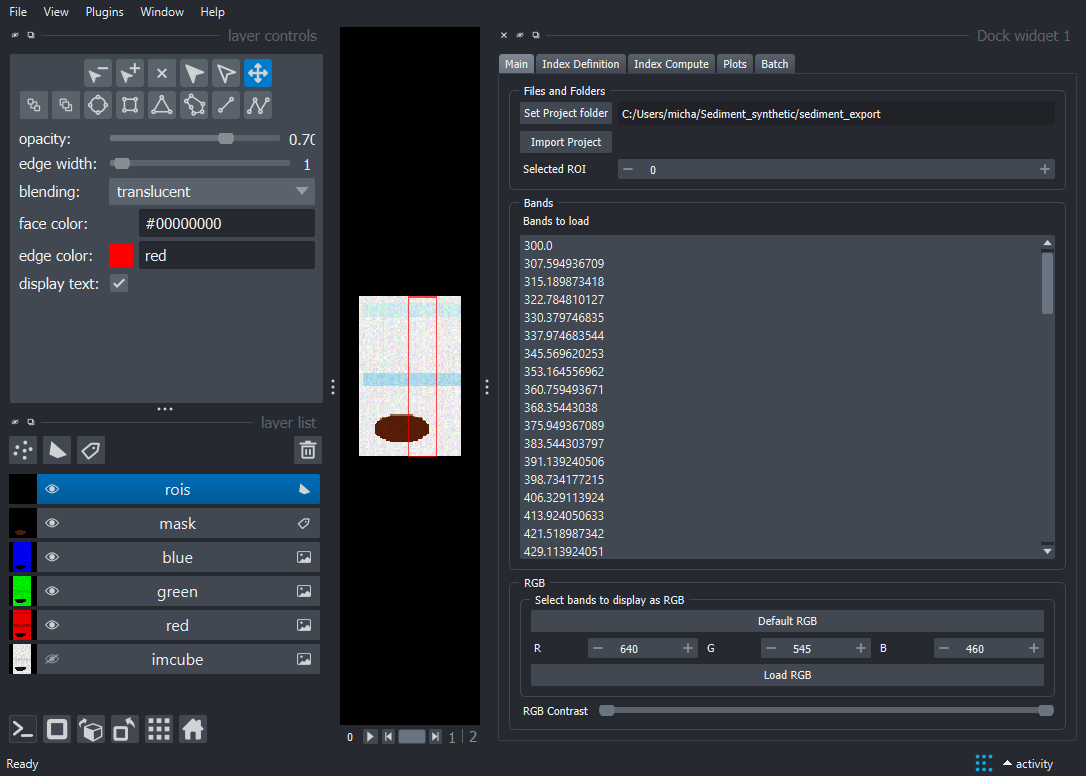

In [5]:
nbscreenshot(viewer)

Again, one needs to select the location of the data. Images are loaded in zarr format so they can be browsed through.

### Indices

In this tab, one can define and compute various indices to quantify absorption bands. In the ```Index Definition``` section, a series of common indices have been preset to use certain combinations of wavelengths. Those can be adjusted either by entering values or by dragging the sliders below the plot. Once adjustments have been made, one can keep those for the the selected index name by clicking on ```Update current index```. One can also create completely new indices by first selecting a triplet (RABD) or pari (RABA/Ratio/RMean) of wavelengths, defining a name (```Myindex```) and clicking on ```New index```. New indices get added to the choices in the ```Index Definition```.

In [6]:
self.spin_index_left.setValue(550)
self.spin_index_middle.setValue(600)
self.spin_index_right.setValue(650)

self.qtext_new_index_name.setText('Myindex')
self._on_click_new_index(None)

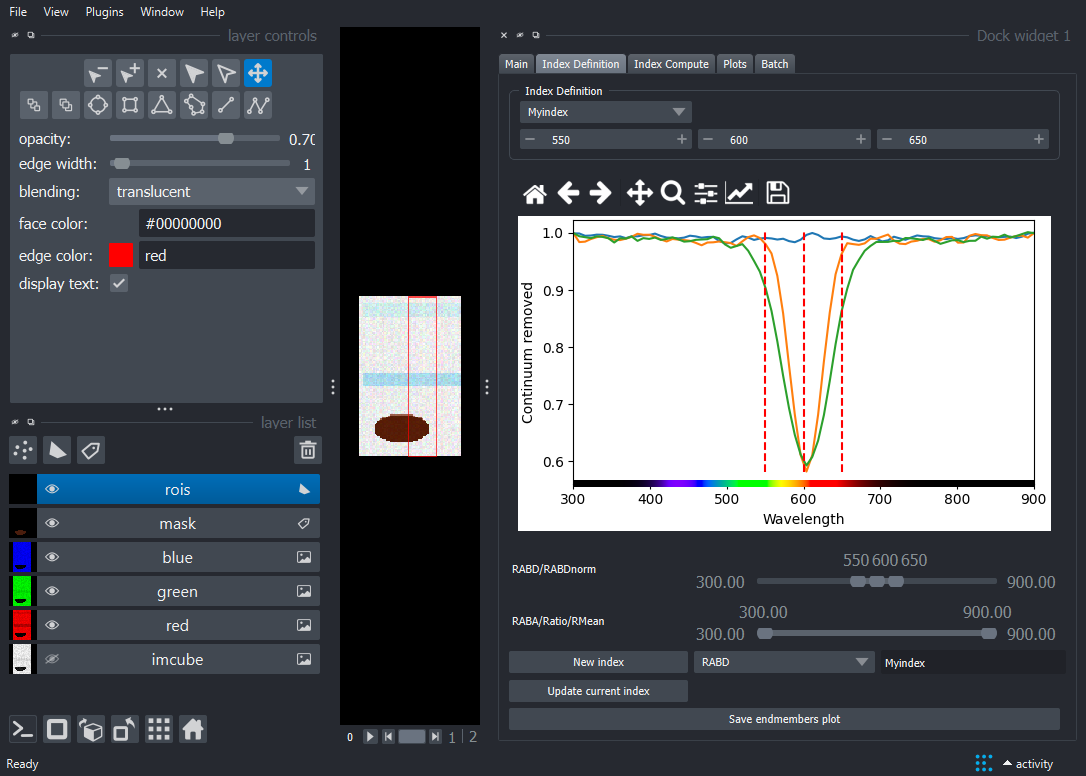

In [7]:
self.tabs.setCurrentIndex(1)
nbscreenshot(viewer)

Once boundaries for index calculation are set, one can compute the index for the entire image in the next tab ```Index Compute```.

## Index Compute

Indices defined in the previous tab appear now in the ```Index  Selection```. Indices to be computed can be selected with the tick boxes. The definitions of selected indices can be exported (as text files) and imported vie the ```Export index settings``` and ```Import index settings``` buttons.

Index computation can be executed from the ```Compute and export``` section by either:
- clicking on ```(Re-)Compute index map(s)```. This will overwrite existing index maps and add them to the viewer.
- clicking on ```Add index map(s) to Viewer```. This will add already computed maps to the Viewer and compute them is missing.

The colormap of each index can be adjusted in the main interface.

Note that is the ```Force recompute``` checkbox is ticked, index maps are recomputed every time they are needed. This ensures that e.g. when adjusting index boundaries, those changes are always taken into account.

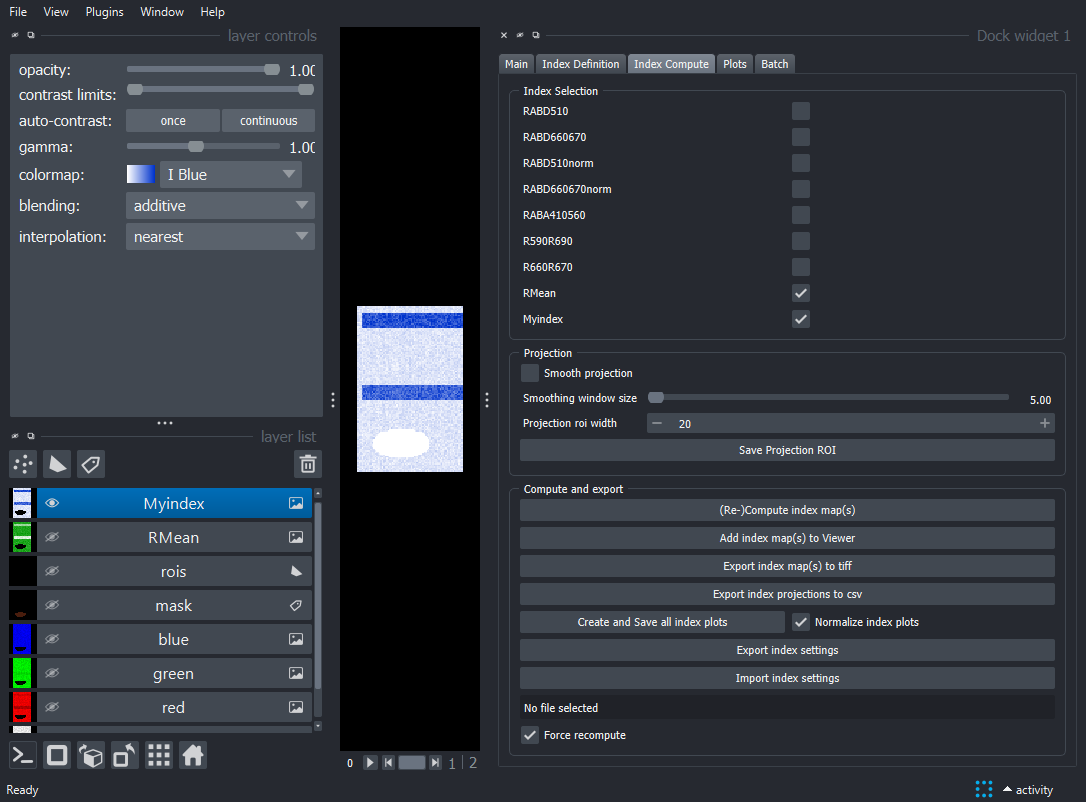

In [8]:
self.tabs.setCurrentIndex(2)
self.index_pick_boxes['Myindex'].setChecked(True)
self.index_pick_boxes['RMean'].setChecked(True)
self._on_compute_index_maps(None)
for x in self.viewer.layers:
    x.visible = False
self.viewer.layers[-1].visible = True
self.viewer.layers[-1].colormap = 'I Blue'
self.viewer.layers[-2].colormap = 'I Forest'
nbscreenshot(viewer)

### Projection ROI 

In addition to index maps, a line-by-line projection within a certain ROI can also be computed, resulting in a 1D signal summarising the index map. The ROI can be adjusted by changing its width in ```Projection roi widht``` and double-clicking in the desired location on the image. The roi can also be adjusted manually directly in the layer. The resulting signal can be smoothed using options visible in the ```Projection section```, ```Smooth window size``` indicating the window size used for Savgol filtering.

### Saving figures

The index maps can be saved as tiff files. Alternatively they can be exported in two types of figures:
- figures containing an image of the data, the index map as well as the projection
- a figure combining all index maps

These figures can all be automatically generated using the ```Create and Save all index plots``` button. An example of such figures is visible below:

In [9]:
self._on_click_create_and_save_all_plots()

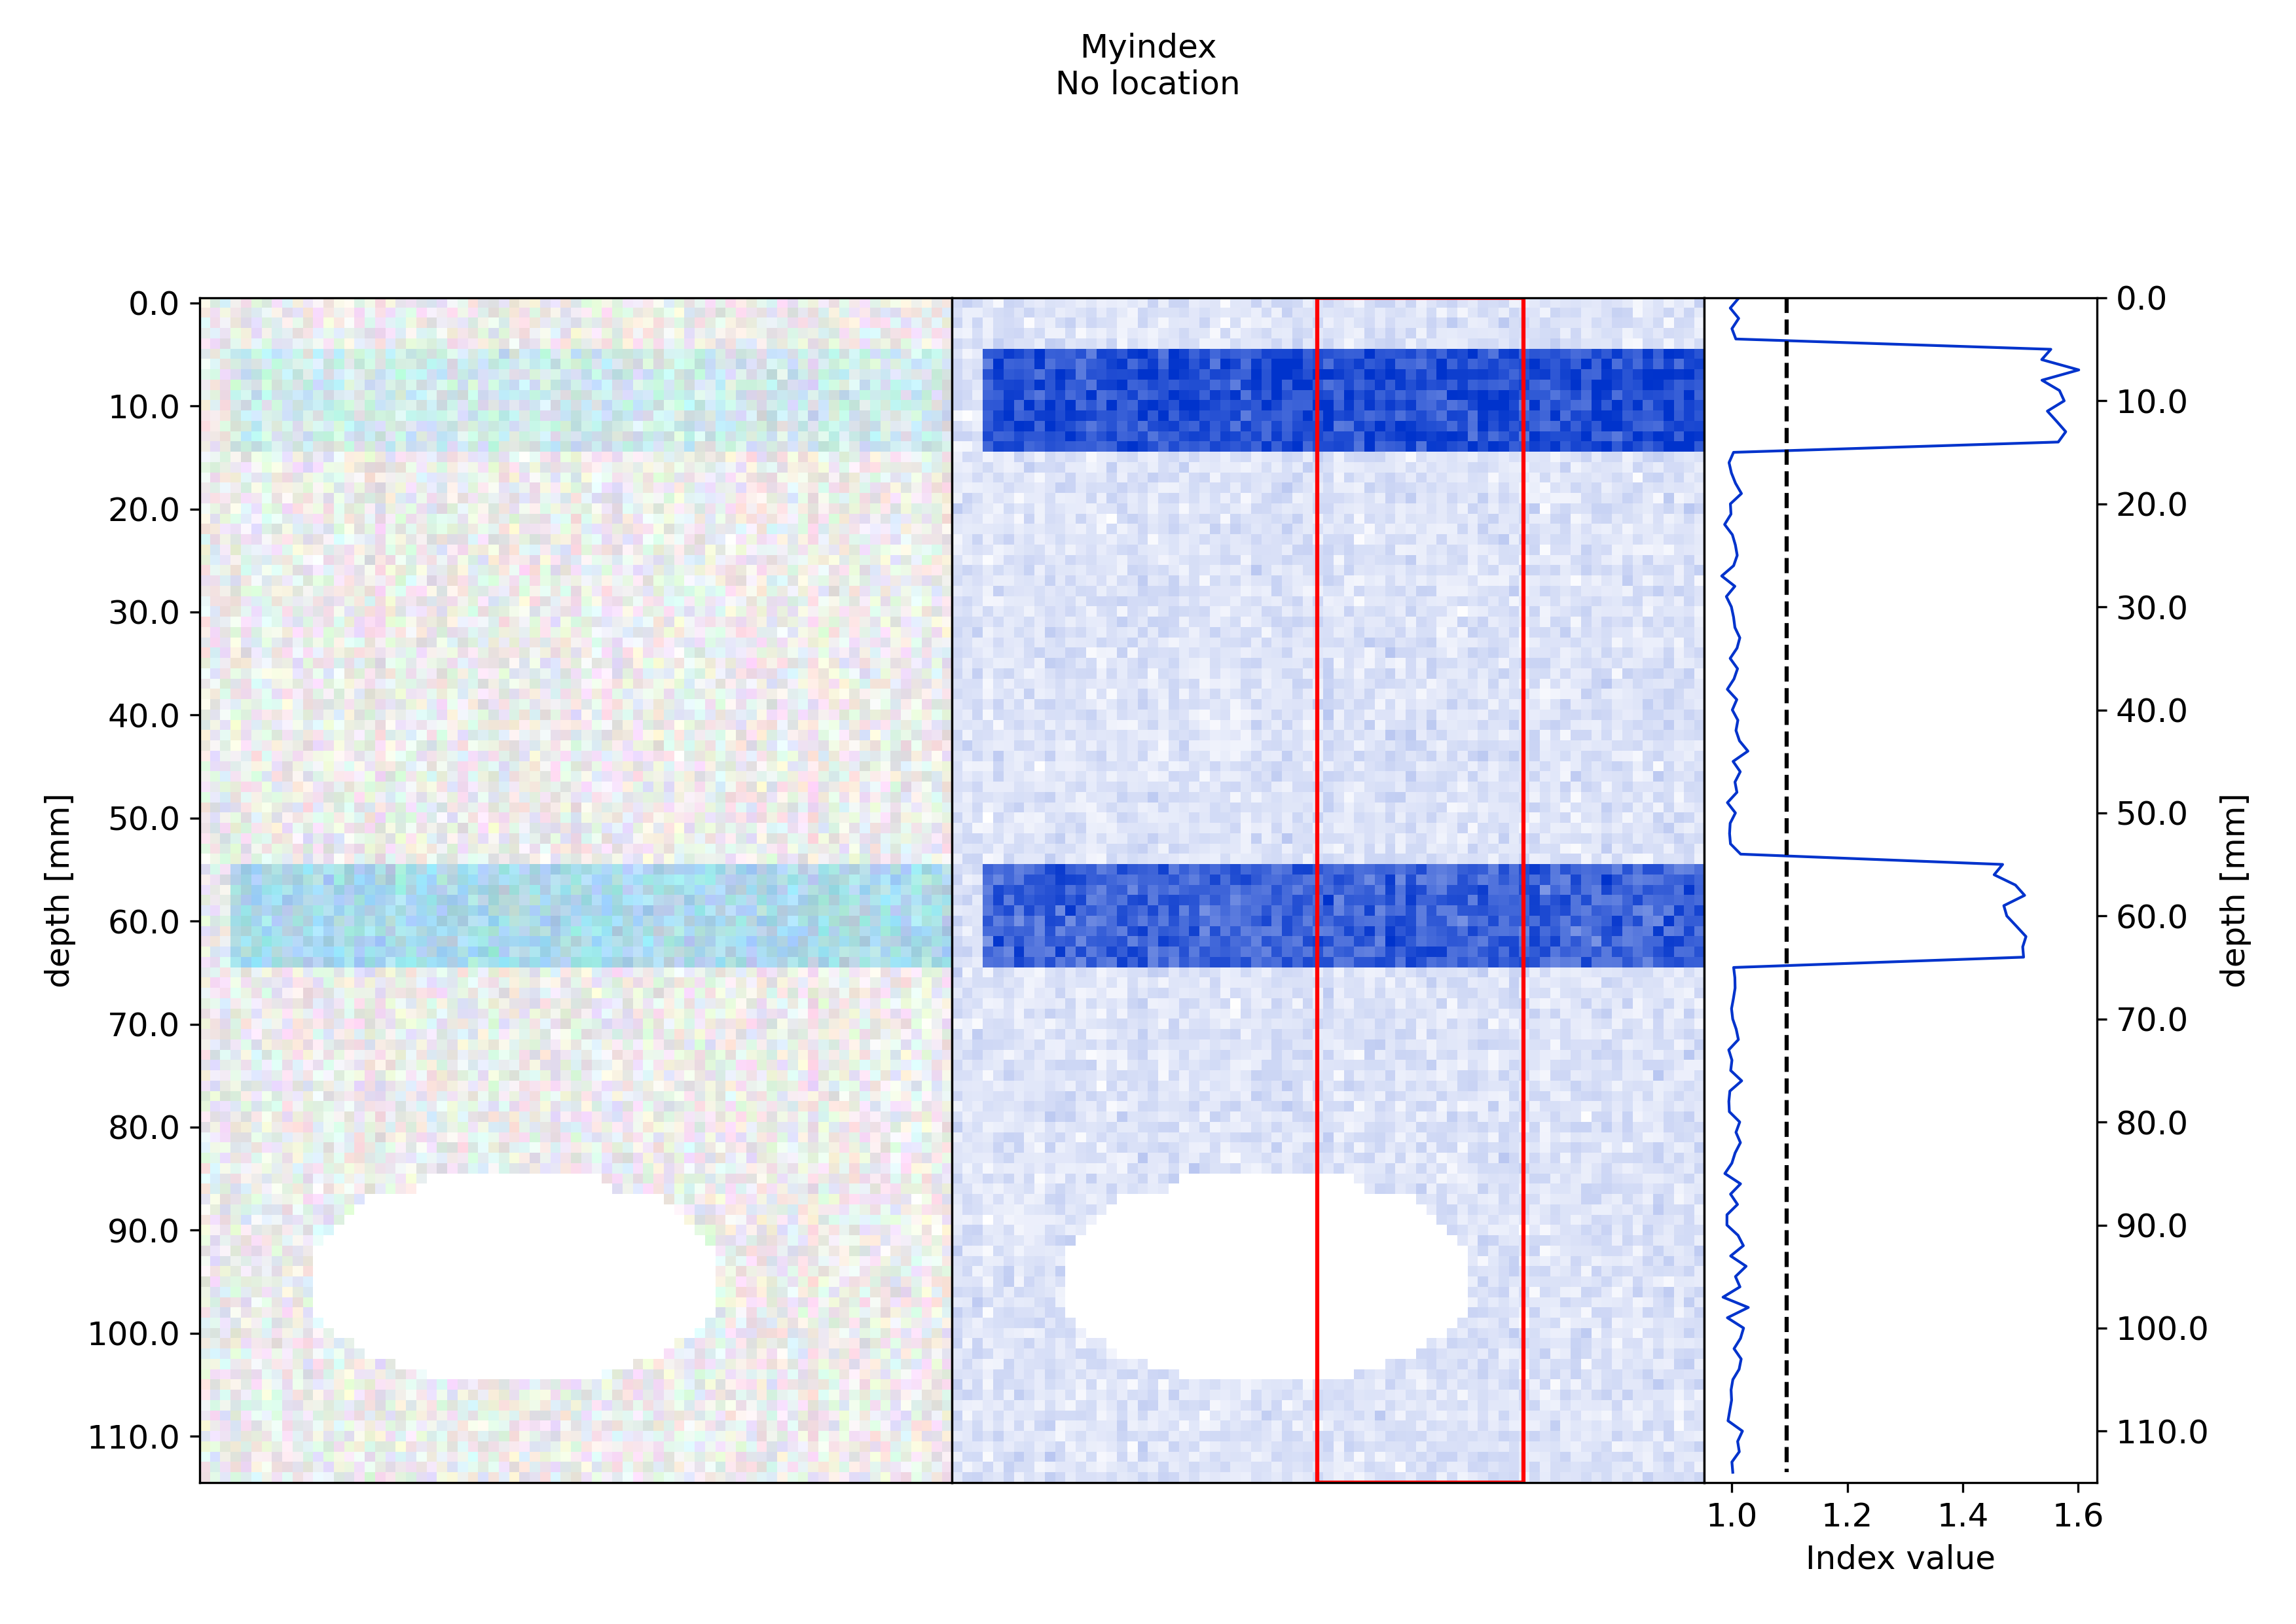

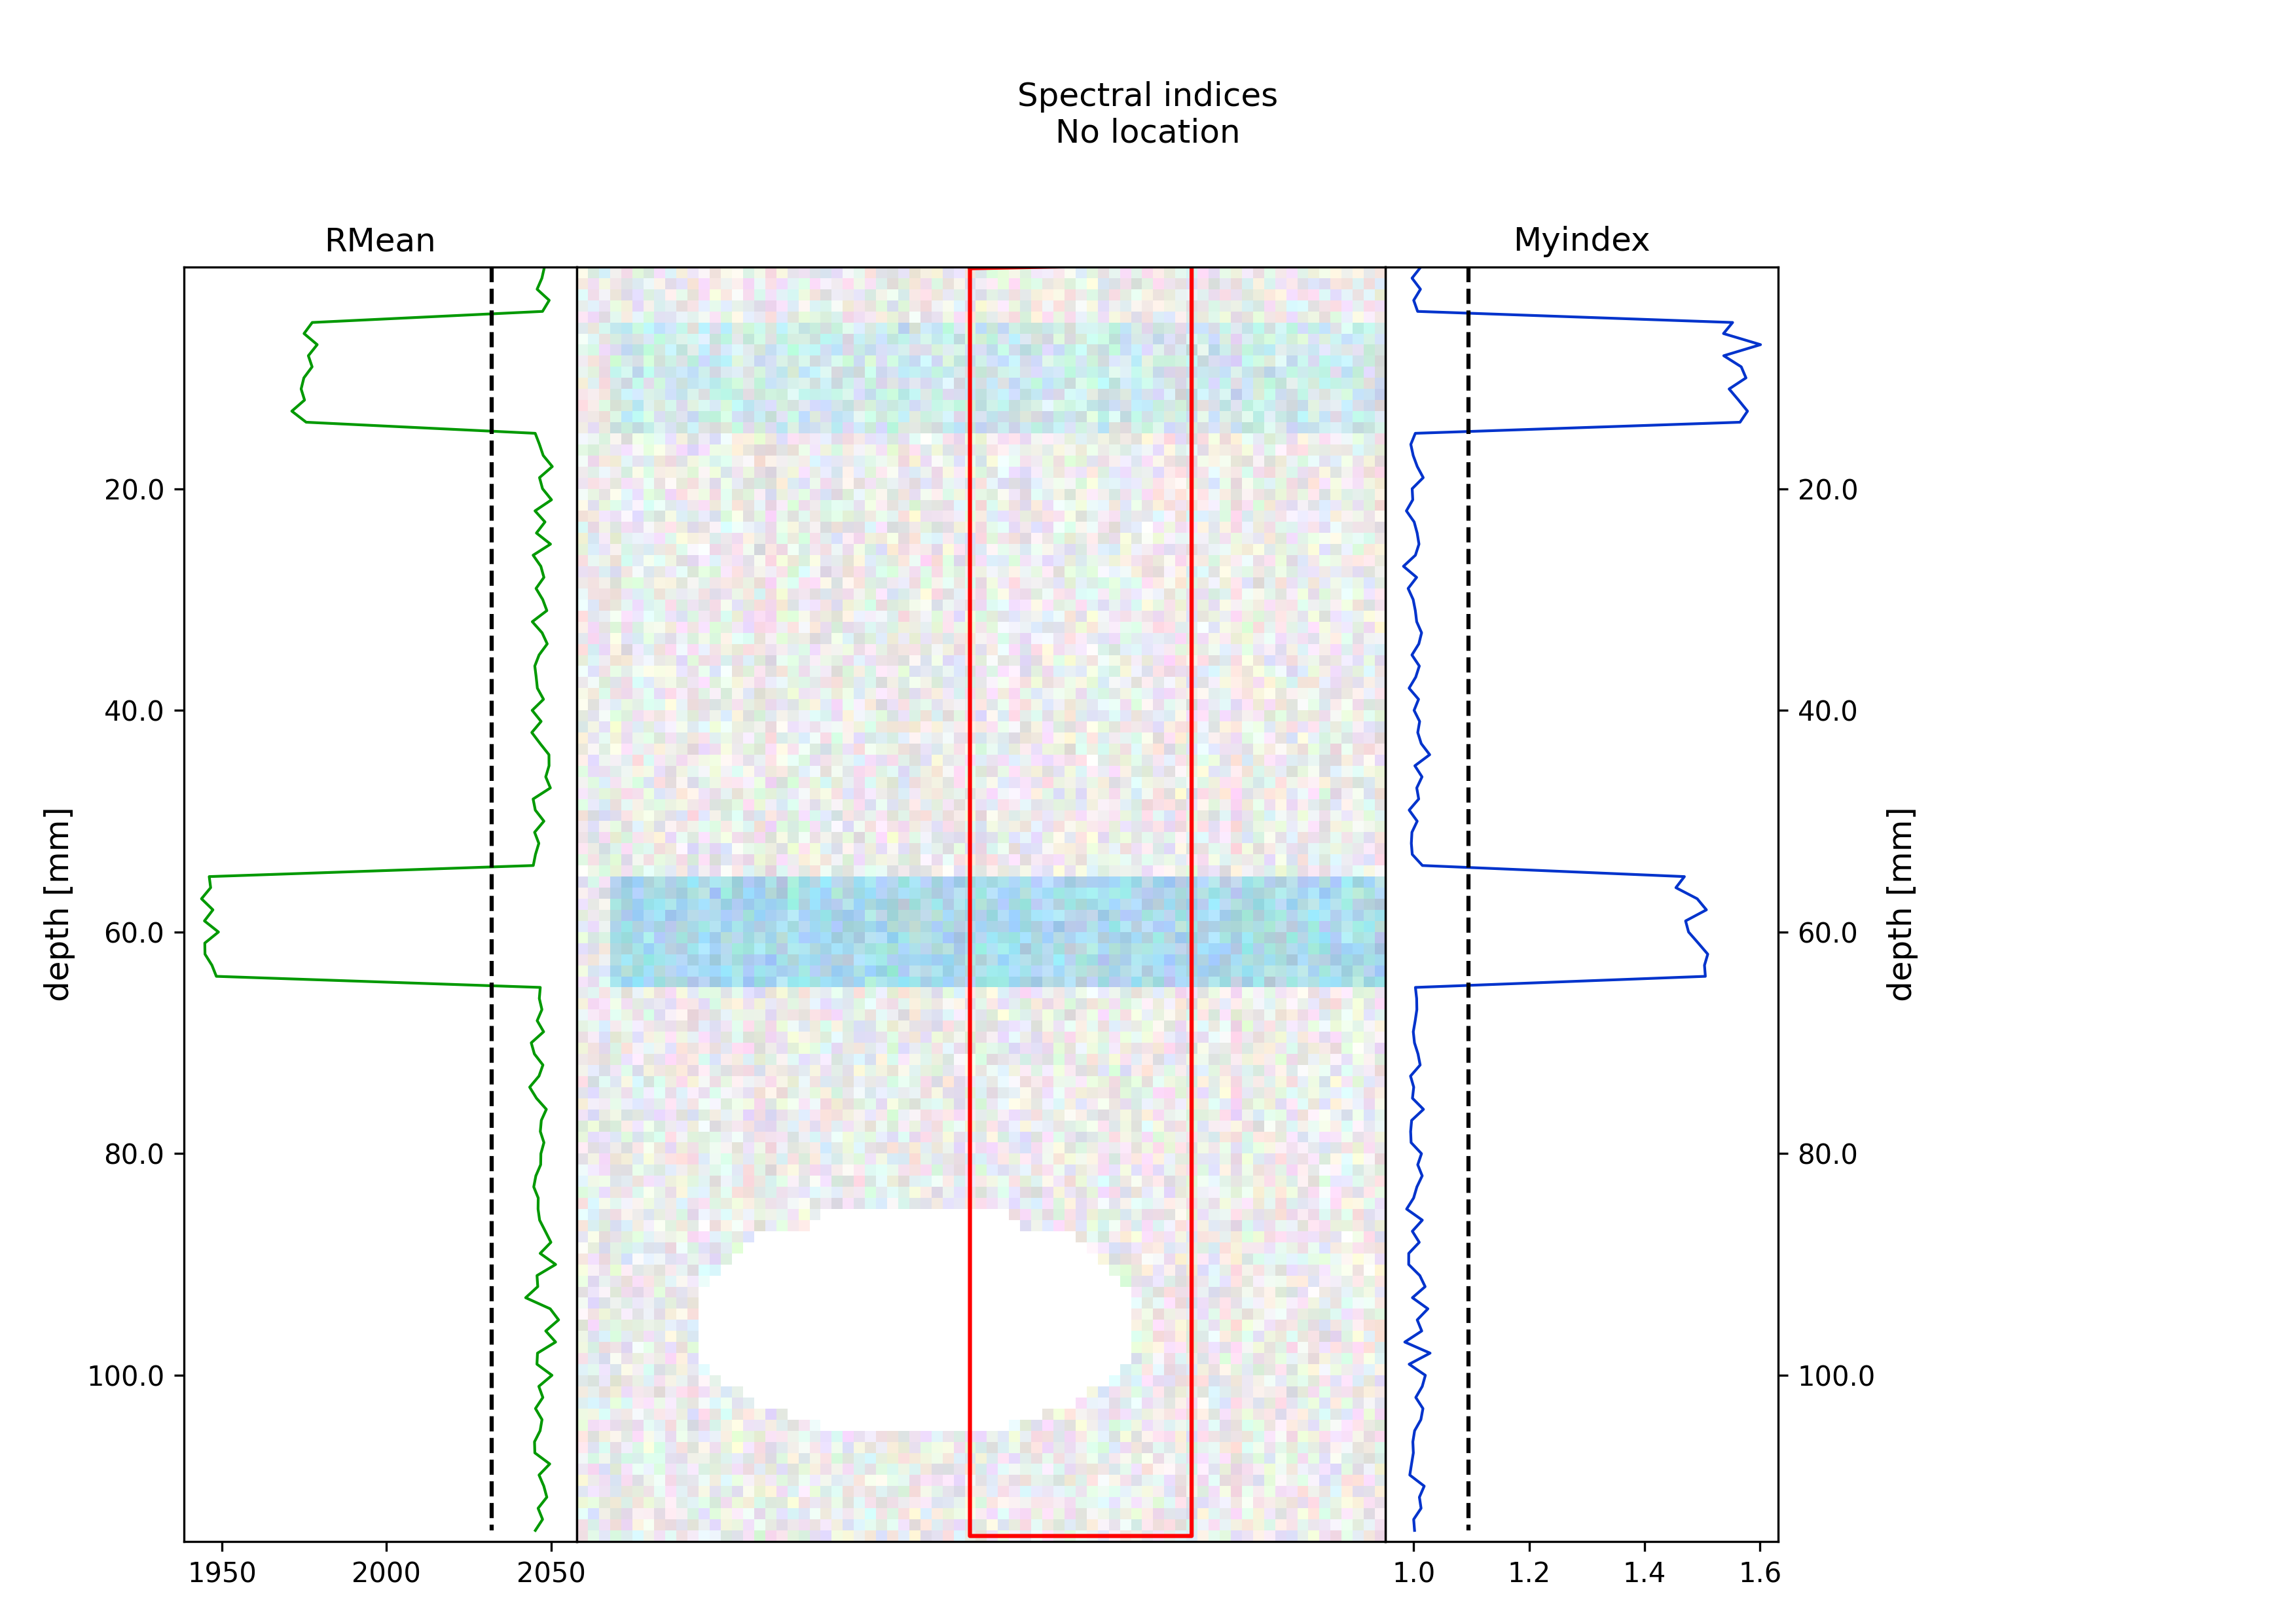

In [10]:
from IPython.display import Markdown, display, Image

image_path = synth_path.joinpath('sediment_export', 'roi_0', 'index_plots', 'Myindex_index_plot.png')
image_path2 = synth_path.joinpath('sediment_export', 'roi_0', 'index_plots', 'multi_index_plot.png')
#image_path = image_path.as_posix()
display(Image(image_path))
display(Image(image_path2))

## Plots

If desired, some of the rendering options of figures can be adjusted in this tab. Those include:
- ```Title Font```: the font size used for the plot title including the index name
- ```Label Font```: the font size for plots x, y labels
- ```Select plot line color```: adjust the color of the projection line
- ```Plot line thickness```: adjust the thickness of the projection line
- The location and scale can be changed here as well

Those plot parameters can be saved in a yml file by clicking on ```Save plot parameters``` and re-used later for other sessions. Results can be pre-viewed using the ```Create index plot``` and ```Create multi-index plot```.

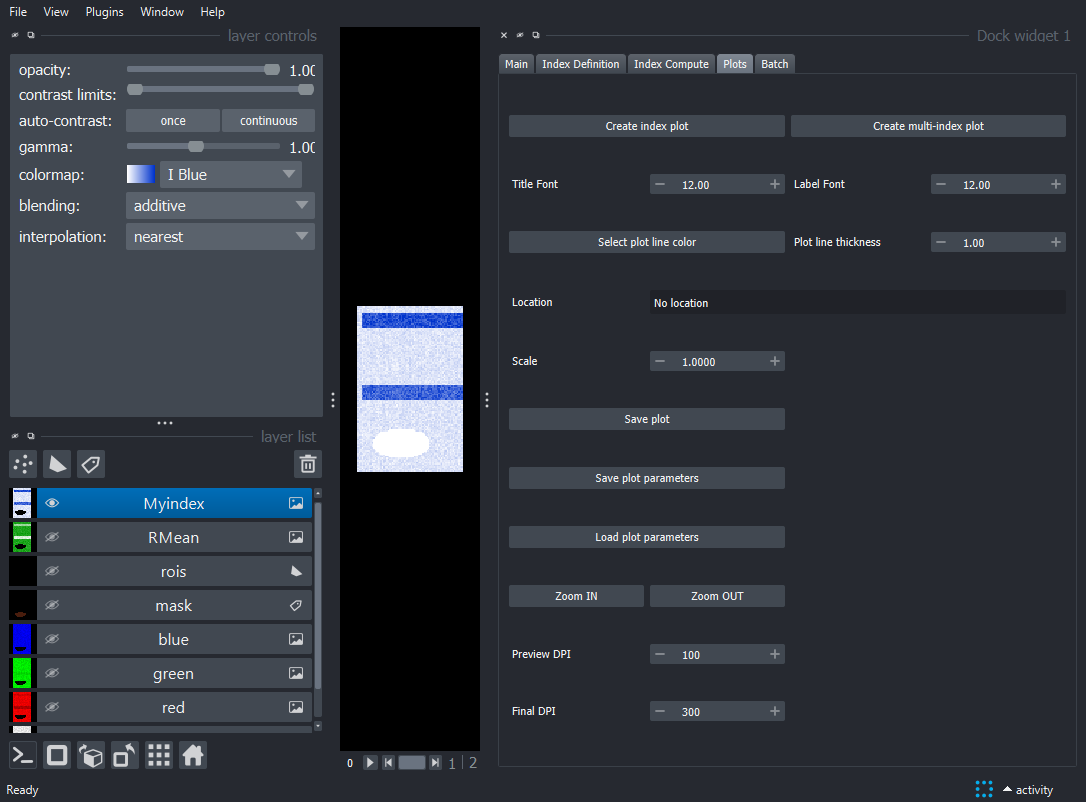

In [11]:
self.tabs.setCurrentIndex(3)
nbscreenshot(viewer)

In [12]:
self._on_click_save_plot_parameters(file_path=synth_path.joinpath('plot_params.yml'))

## Batch

In the batch tab you can run the whole index computing and figure generation for multiple experiments in a given folder. For that you will need:
- a ```Plot_parameters.yml``` file that you can save in the previous tab. This will be used to format all figures.
- an ```index_settings.yml``` file that you get when generating figures or using the ```Export index settings``` button in the ```Index Compute``` tab.

You can optionally also generate a normalized version of plots by ticking the ```Normalize``` box. This will normalize plots across **all** datasets in the main folder.

Here we use the settings used in our single dataset to analyze the ```sediment_export_series``` folder.

In [13]:
self._on_click_select_main_batch_folder(main_folder=synth_path.joinpath('sediment_export_series'))
self.batch_plot_params_file.value = synth_path.joinpath('plot_params.yml')
self.batch_index_params_file.value = synth_path.joinpath('sediment_export', 'index_settings.yml')

In [14]:
self._on_click_batch_create_plots()

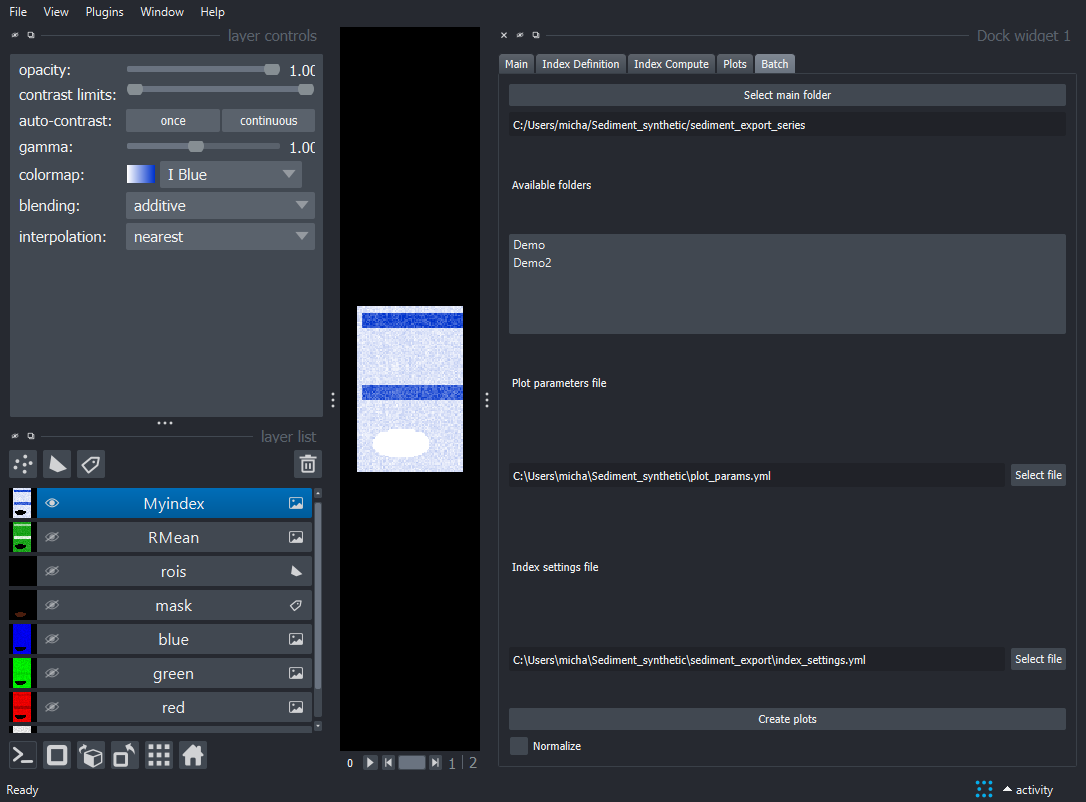

In [15]:
self.tabs.setCurrentIndex(4)
nbscreenshot(viewer)

Here's an example of the resulting figures. Note that like here, in case the no regions of interest have been selected in this series of data, plots are generated with the full images.

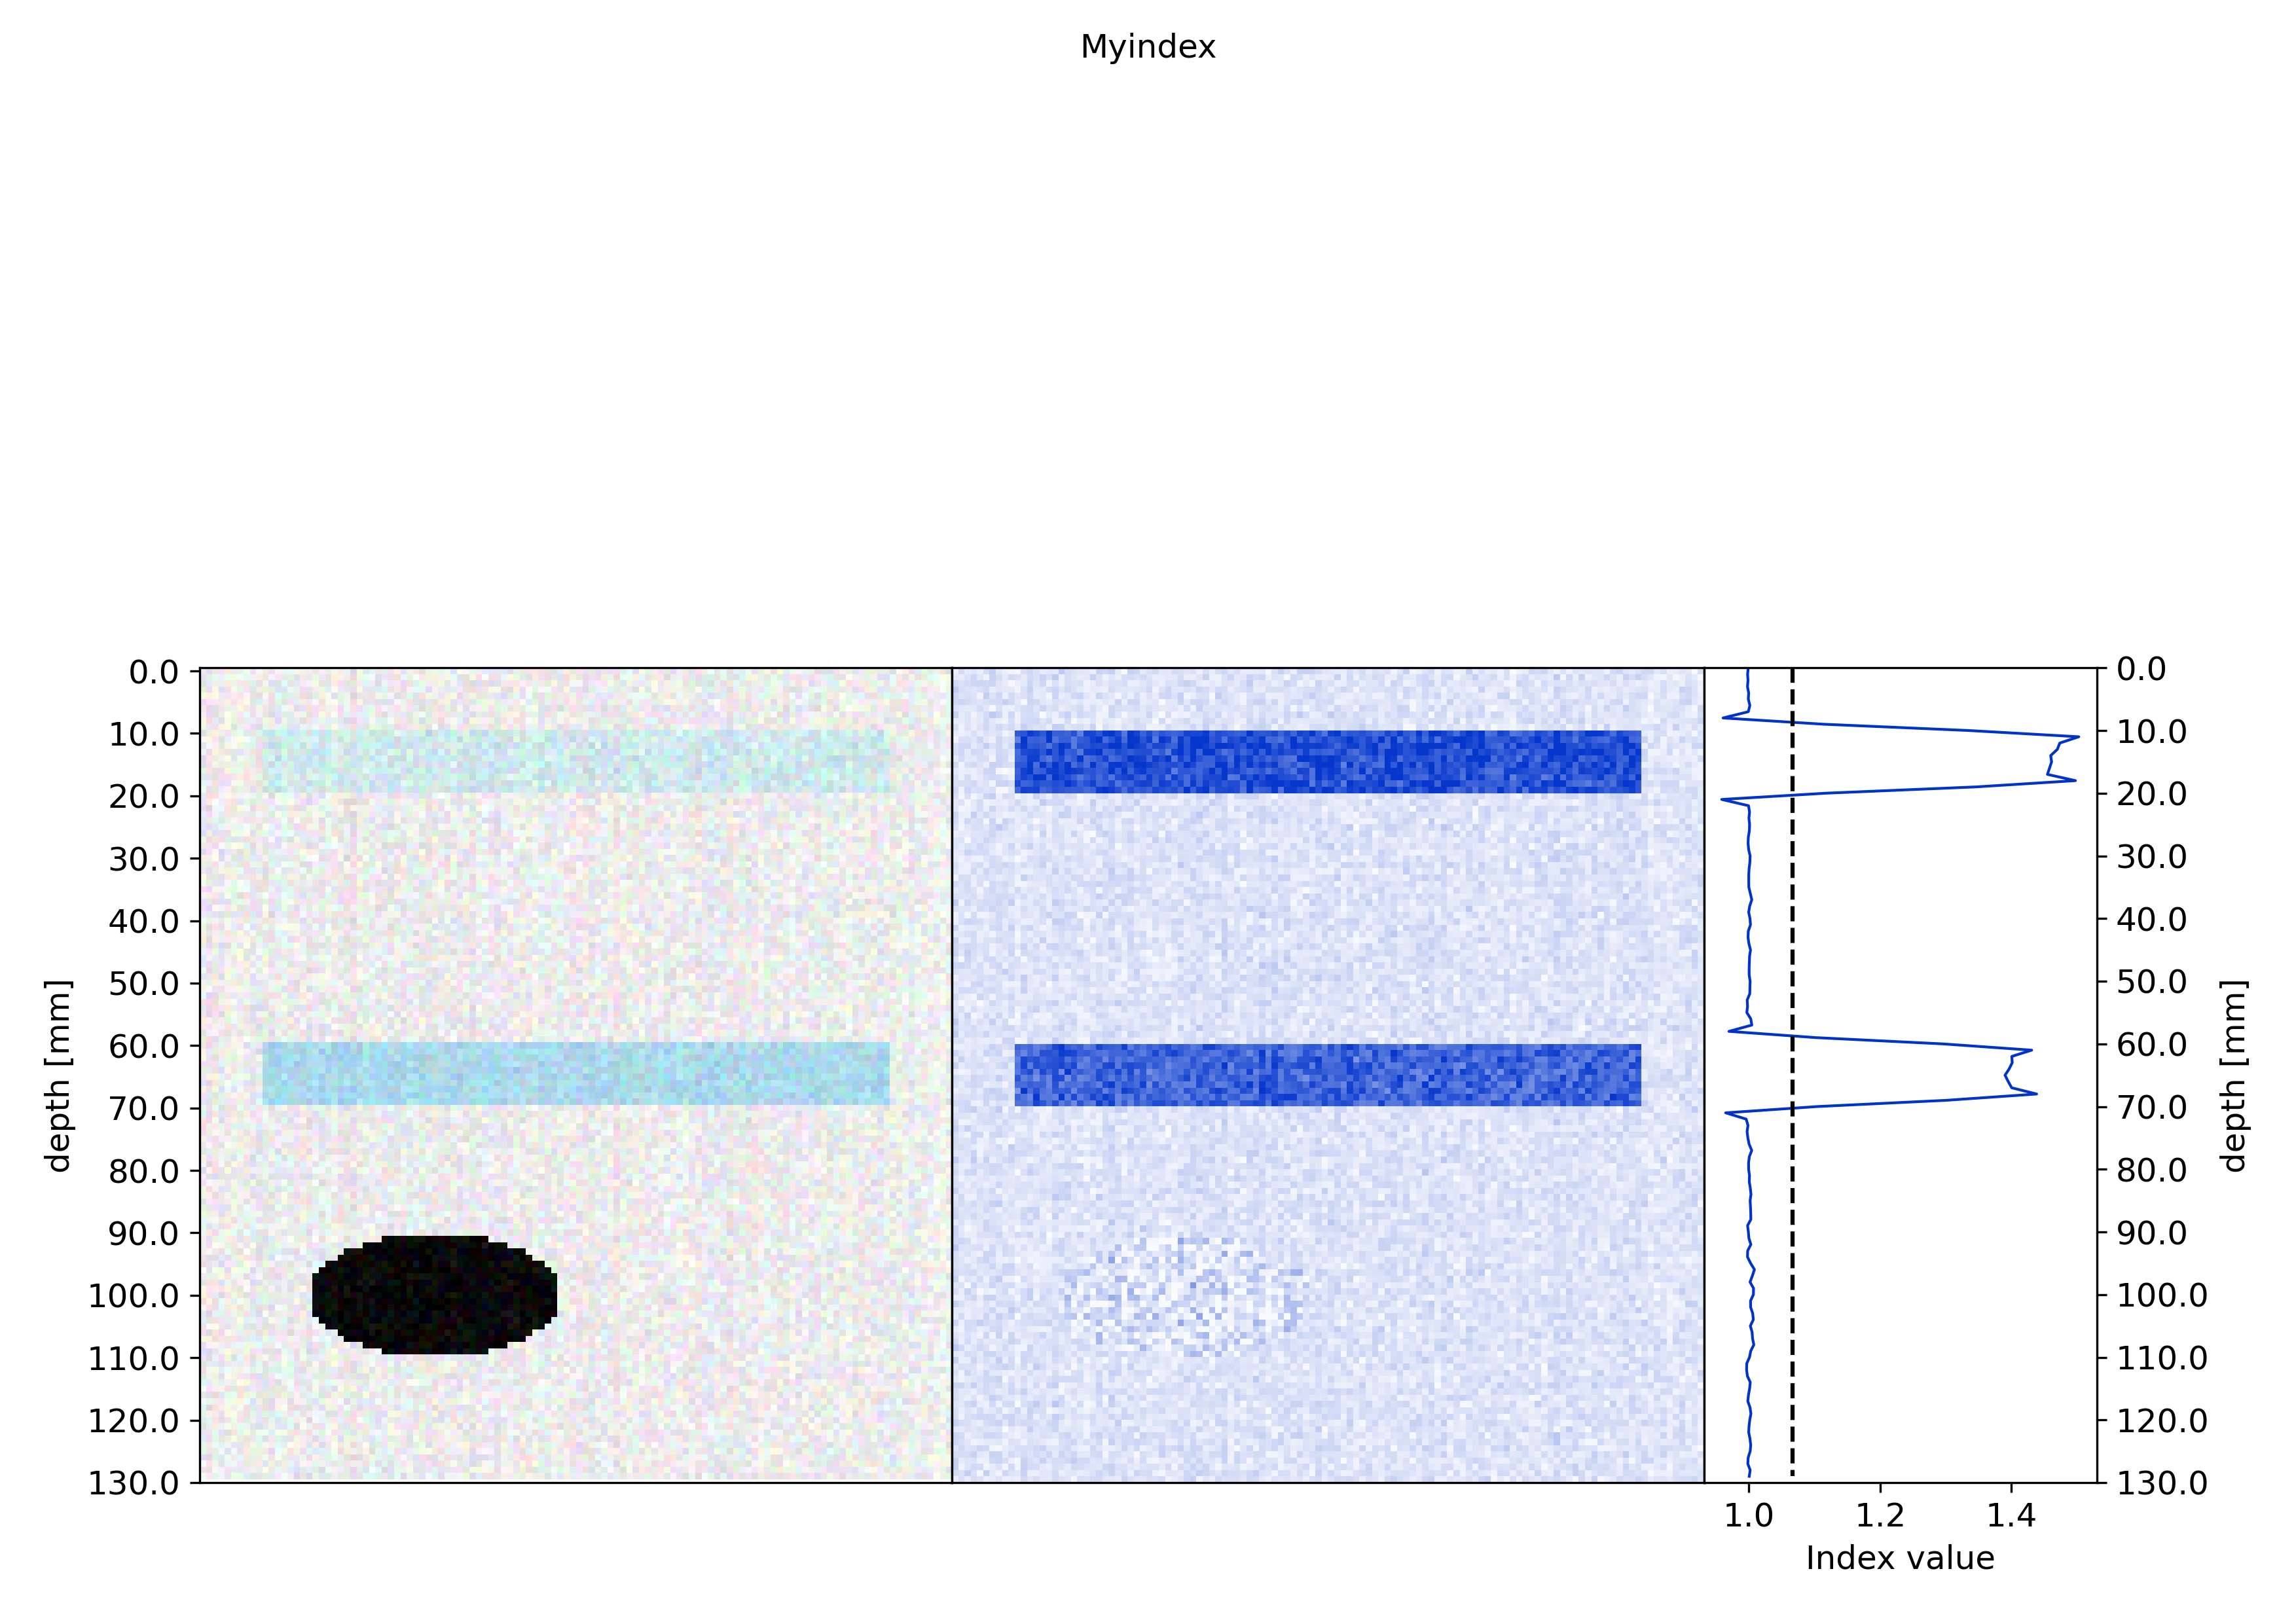

In [16]:
image_path = synth_path.joinpath('sediment_export_series', 'Demo', 'roi_0', 'index_plots', 'Myindex_index_plot.png')
display(Image(image_path))